# Лабораторна робота №8

## Тема: Структура даних граф. Алгоритми на графах.
## Мета: Засвоїти представлення структури даних граф та основні алгоритми роботи з ними засобами Python.

## 1. Опрацювати короткі теоретичні відомості.

## 2. Для варіанту, заданого викладачем, задати і візуалізувати граф за допомогою коду

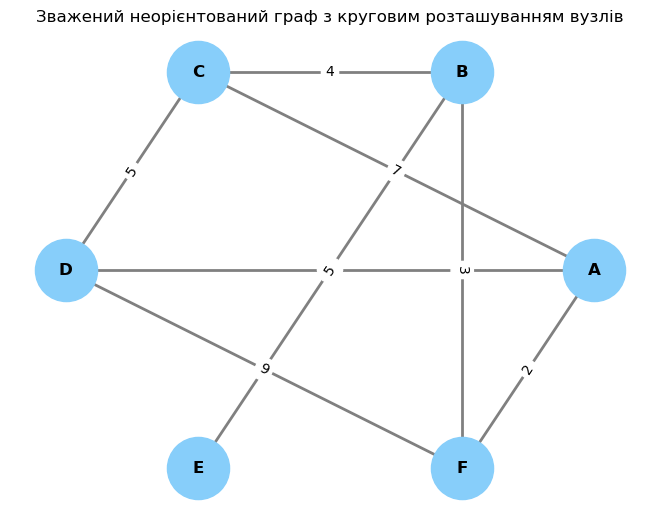

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math

G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)
G.add_weighted_edges_from([
    ('E', 'B', 5),
    ('A', 'C', 7),
    ('A', 'D', 3),
    ('B', 'C', 4),
    ('C', 'D', 5),
    ('D', 'F', 9),
    ('B', 'F', 3),
    ('A', 'F', 2)
])
num_nodes = len(nodes)
pos = {}
radius = 2 
for i, node in enumerate(nodes):
    angle = 2 * math.pi * i / num_nodes
    x = radius * math.cos(angle)
    y = radius * math.sin(angle)
    pos[node] = (x, y)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightskyblue', node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Зважений неорієнтований граф з круговим розташуванням вузлів")
plt.axis('off')  
plt.show()

## 3. Реалізація алгоритмів

### Алгоритм Дейкстри

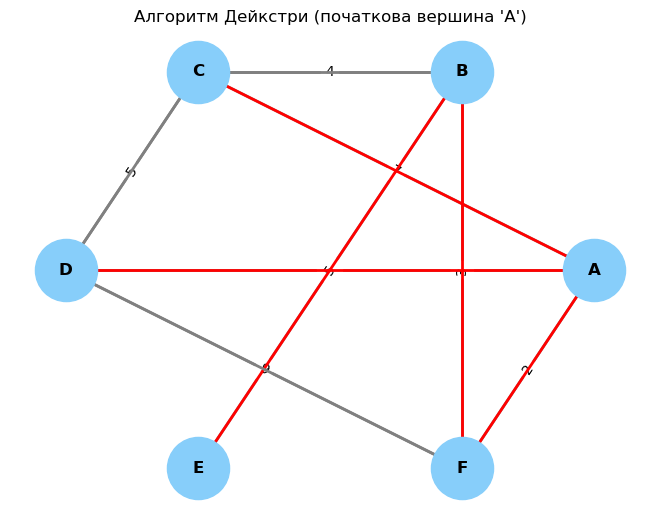

Найкоротші шляхи від вершини 'A': {'A': ['A'], 'C': ['A', 'C'], 'D': ['A', 'D'], 'F': ['A', 'F'], 'B': ['A', 'F', 'B'], 'E': ['A', 'F', 'B', 'E']}
Довжини найкоротших шляхів від вершини 'A': {'A': 0, 'F': 2, 'D': 3, 'B': 5, 'C': 7, 'E': 10}


In [2]:
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)
edges = [
    ('E', 'B', 5),
    ('A', 'C', 7),
    ('A', 'D', 3),
    ('B', 'C', 4),
    ('C', 'D', 5),
    ('D', 'F', 9),
    ('B', 'F', 3),
    ('A', 'F', 2)
]
G.add_weighted_edges_from(edges)
source_node = 'A'
shortest_paths = nx.shortest_path(G, source=source_node, weight='weight')
shortest_path_lengths = nx.shortest_path_length(G, source=source_node, weight='weight')
pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightskyblue', node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
path_edges = set()
for target_node, path in shortest_paths.items():
    if target_node != source_node:
        for i in range(len(path) - 1):
            path_edges.add(tuple(sorted((path[i], path[i+1]))))
colored_edges = [(u, v) if tuple(sorted((u, v))) in path_edges else (u, v) for u, v in G.edges()]
edge_colors = ['red' if tuple(sorted(e)) in path_edges else 'gray' for e in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=[e for e in G.edges()], edge_color=edge_colors, width=2)
plt.title(f"Алгоритм Дейкстри (початкова вершина '{source_node}')")
plt.axis('off')
plt.show()
print(f"Найкоротші шляхи від вершини '{source_node}': {shortest_paths}")
print(f"Довжини найкоротших шляхів від вершини '{source_node}': {shortest_path_lengths}")

### Алгоритм Белмана-Форда

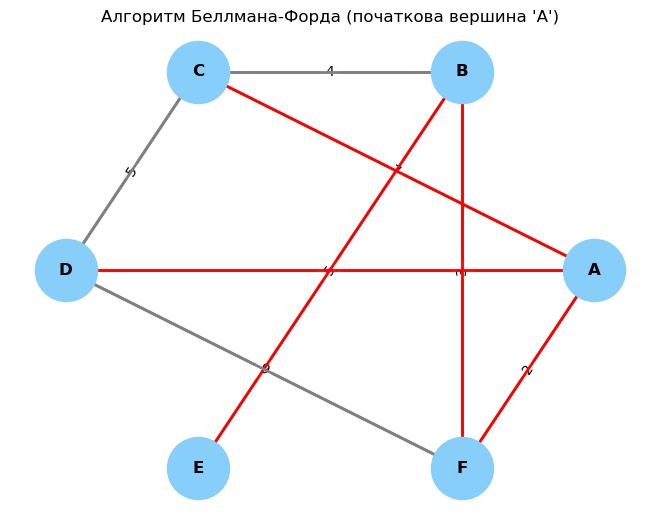

Найкоротші шляхи від вершини 'A': {'A': ['A'], 'C': ['A', 'C'], 'D': ['A', 'D'], 'F': ['A', 'F'], 'B': ['A', 'F', 'B'], 'E': ['A', 'F', 'B', 'E']}
Довжини найкоротших шляхів від вершини 'A': {'A': 0, 'C': 7, 'D': 3, 'F': 2, 'B': 5, 'E': 10}


In [3]:
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)
edges = [
    ('E', 'B', 5),
    ('A', 'C', 7),
    ('A', 'D', 3),
    ('B', 'C', 4),
    ('C', 'D', 5),
    ('D', 'F', 9),
    ('B', 'F', 3),
    ('A', 'F', 2)
]
G.add_weighted_edges_from(edges)
source_node = 'A'
shortest_paths = nx.single_source_bellman_ford_path(G, source=source_node, weight='weight')
shortest_path_lengths = nx.single_source_bellman_ford_path_length(G, source=source_node, weight='weight')
pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightskyblue', node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
path_edges = set()
for target_node, path in shortest_paths.items():
    if target_node != source_node and path is not None:
        for i in range(len(path) - 1):
            path_edges.add(tuple(sorted((path[i], path[i+1]))))
colored_edges = [(u, v) if tuple(sorted((u, v))) in path_edges else (u, v) for u, v in G.edges()]
edge_colors = ['red' if tuple(sorted(e)) in path_edges else 'gray' for e in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=[e for e in G.edges()], edge_color=edge_colors, width=2)
plt.title(f"Алгоритм Беллмана-Форда (початкова вершина '{source_node}')")
plt.axis('off')
plt.show()
print(f"Найкоротші шляхи від вершини '{source_node}': {shortest_paths}")
print(f"Довжини найкоротших шляхів від вершини '{source_node}': {shortest_path_lengths}")

### Пошук у глибину

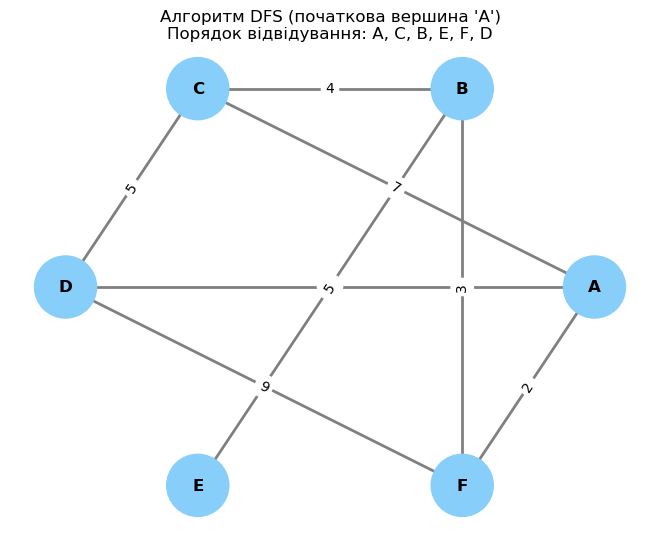

Порядок відвідування вузлів (DFS з початкової вершини 'A'): ['A', 'C', 'B', 'E', 'F', 'D']


In [49]:
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)
edges = [
    ('E', 'B', 5),
    ('A', 'C', 7),
    ('A', 'D', 3),
    ('B', 'C', 4),
    ('C', 'D', 5),
    ('D', 'F', 9),
    ('B', 'F', 3),
    ('A', 'F', 2)
]
G.add_weighted_edges_from(edges)
start_node = 'A'
dfs_order = list(nx.dfs_preorder_nodes(G, source=start_node))
node_colors = ['lightskyblue' if node in dfs_order else 'lightgray' for node in G.nodes()]
pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title(f"Алгоритм DFS (початкова вершина '{start_node}')\nПорядок відвідування: {', '.join(dfs_order)}")
plt.axis('off')
plt.show()
print(f"Порядок відвідування вузлів (DFS з початкової вершини '{start_node}'): {dfs_order}")

### Пошук в ширину

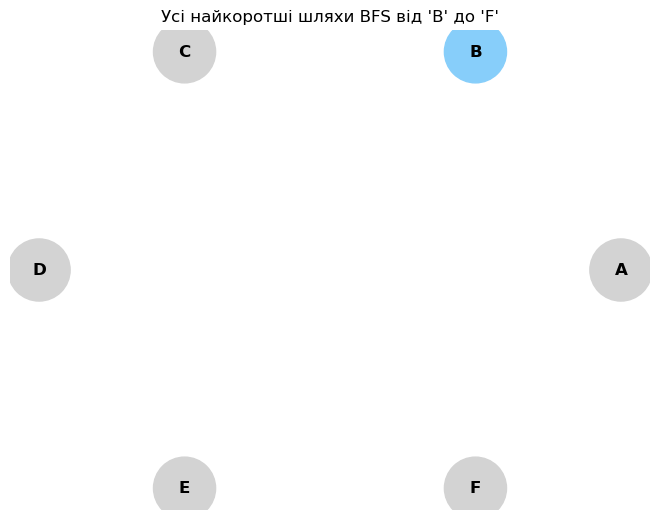

Шлях від 'B' до 'F' не знайдено за допомогою BFS.


In [4]:
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)
edges = [
    ('E', 'B', 5),
    ('A', 'C', 7),
    ('A', 'D', 3),
    ('B', 'C', 4),
    ('C', 'D', 5),
    ('D', 'F', 9),
    ('B', 'F', 3),
    ('A', 'F', 2)
]
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next_node in set(graph.adj[vertex].keys()) - set(path):
            if next_node == goal:
                yield path + [next_node]
            else:
                queue.append((next_node, path + [next_node]))
start_node = 'B'
target_node = 'F'
all_shortest_paths = list(bfs_paths(G, start_node, target_node))
node_colors = ['lightskyblue' if node in nx.shortest_path(G, source=start_node) else 'lightgray' for node in G.nodes()]
pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title(f"Усі найкоротші шляхи BFS від '{start_node}' до '{target_node}'")
plt.axis('off')
plt.show()
if all_shortest_paths:
    print(f"Усі найкоротші шляхи (за кількістю ребер) від '{start_node}' до '{target_node}':")
    for path in all_shortest_paths:
        path_edges_with_weights = []
        for i in range(len(path) - 1):
            u, v = path[i], path[i+1]
            weight = G.get_edge_data(u, v).get('weight', 1)
            path_edges_with_weights.append(f"({u}, {v}, вага: {weight})")
        print(f"  Шлях: {path}, Ребра: {', '.join(path_edges_with_weights)}")
else:
    print(f"Шлях від '{start_node}' до '{target_node}' не знайдено за допомогою BFS.")

## 4. Контрольні запитання

### 1. Граф — це математична структура, яка складається з вершин та ребер, яка є універсальною моделю для опису зв'язків і відносин. Використовується в знаходженнях найкротших шляхів в різних сферах.
### 2. Орієнтований, неорєнтований, зважений, незважений, повний, звязний, циклічний. Відмінності між орієнтованим та неорієнтованим графом: головна відмінність це напрямок ребер(у орієнтованих він є, а в неорієнтованих його нема). 
### 3. Основними способами подання графу у памяті комп'ютера є матриця суміжності та список суміжностей. Матриця суміжності - квадратна таблиця, де комірка (i, j) вказує на наявність та вагу ребра між вершинами i та j. Список суміжностей - для кожної вершини зберігається список її сусідів та вага ребра.
### 4. Алгоритм починає свою роботу з початкової вершини, додаючи її в чергу та позначає як відвідану, беручи кожну вершину з черги поки вона не стане пустою та перевіряє її сусідів, кожного позначаючи як відвідану вершину. Знаходження найкоротшого шляху по вулицях, чи існує шлях між двома вершинами, обхід комп'ютерної мережі, інше.
### 5. Це алгоритм обходу графа, який починає з початкової вершини й іде вглиб графа, відвідуючи вершини, поки можливо, перш ніж повернутись назад. Здійснюється за допомогою стека або рекурсії. Різниця між DFS та BFS полягає в порядку обходу та пошуку шляху. Використовується в іграх, розв'язанні лабіринтів та топологічному сортуванні.
### 6. Це алгоритм, який знаходить найкоротші шляхи від однієї початкової вершини до всіх інших вершин у зваженому графі з невід’ємними вагами ребер, поступово знаходячи найкоротший шлях до кожної вершини, оновлюючи відстані лише тоді, коли знаходиться коротший шлях, і поступово фіксуючи ті, до яких вже точно знайшли мінімальний шлях. 